# Methoden

#### Setup der Bibliotheken in Jupyter

Turtle Grafik gehört nicht zum Standardumfang der Java Programmiersprache. Die Funktionalität die wir hier nutzen wird von einer externen *Bibliothek* zur Verfügung gestellt. Java und die Jupyter-Notebook Umgebung wissen zunächst mal nichts von dieser Bibliothek. Damit wir die Befehle in dieser Bibliothek verwenden können, müssen wir Sie zuerst im Jupyter-Notebook zur Verfügung stellen. Dies geschieht mit den folgenden Befehlen:

In [1]:
%classpath config resolver bintray https://dl.bintray.com/egp/maven
%classpath add mvn ch.unibas.informatik:jturtle:0.6

%import static ch.unibas.informatik.jturtle.TurtleCommands.*

Added new repo: bintray


## Parameterlose Methoden

Beim programmieren müssen wir häufig fast immer mehrere Befehle hintereinander ausführen um ein bestimmtes Verhalten zu erreichen. Als Beispiel nehmen wir wieder unsere Turtle Grafik. 

Um ein rechtwinkliges Dreick zu zeichnen, brauchen wir die folgenden Befehle:

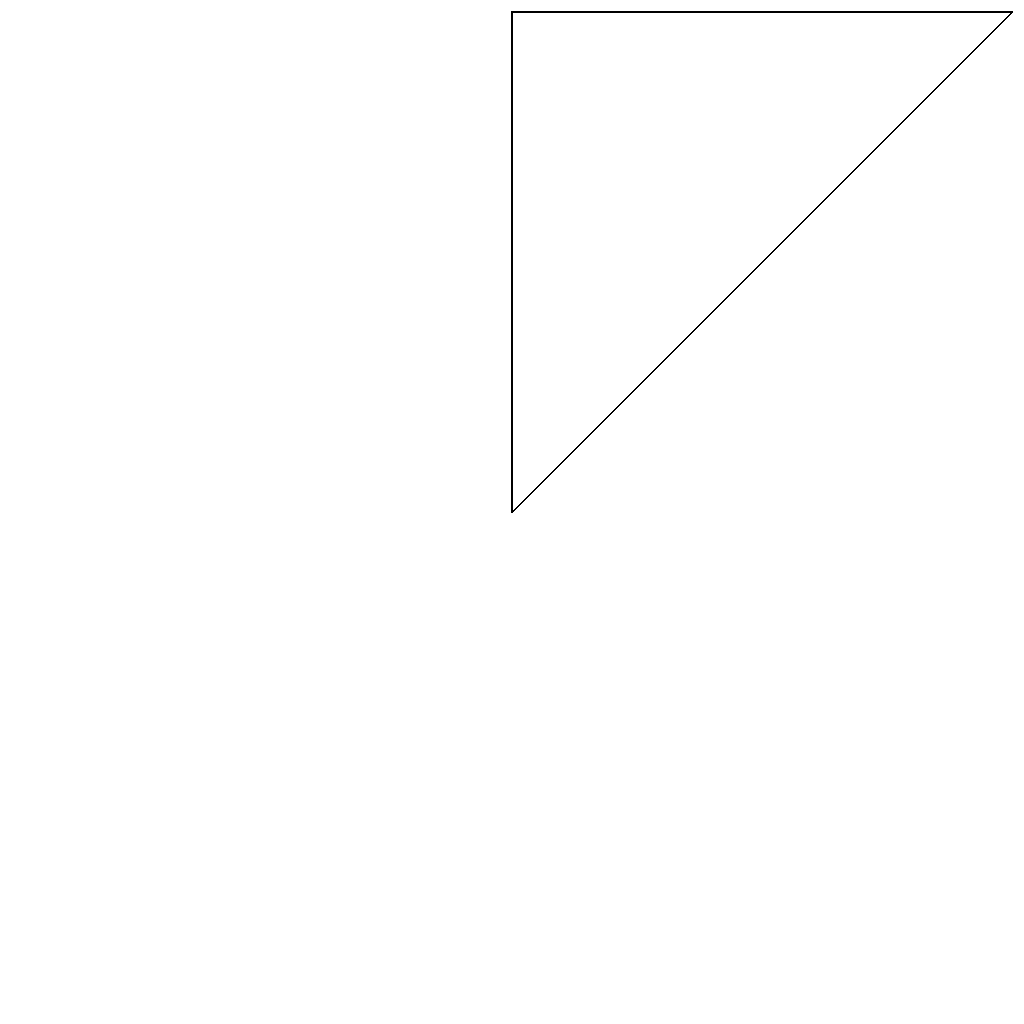

null

In [2]:
clear();
home();
penDown();


forward(100);
turnRight(90);
forward(100);
turnRight(135);
forward(Math.sqrt(100 * 100  + 100 * 100)) ;
turnRight(90);
display(drawing());

Jedesmal wenn wir dieses Dreick wieder zeichnen wollen, müssen wir die Sequenz wiederholen. Dies ist nicht nur mühsam zum schreiben, sondern ist für den Leser des Programms auch schwierig zu verstehen. Besser ist es, wenn wir eine parameterlose Methode einführen. 

*Anmerkung:* Eine Methode muss immer in einer Klasse stehen. Wir müssen deshalb hier zusätzlich eine Klasse, die wir ```Shapes``` nennen, einführen.

In [3]:
class Shapes {
    static void drawRightAngledTriangle() {
        clear();
        home();
        forward(100);
        turnRight(90);
        forward(100);
        turnRight(135);
        forward(Math.sqrt(100 * 100 + 100 * 100)) ;
        turnRight(90);
        display(drawing());
    }
}

com.twosigma.beaker.javash.bkr935597af.Shapes

Diese können wir nun beliebig oft aufrufen:

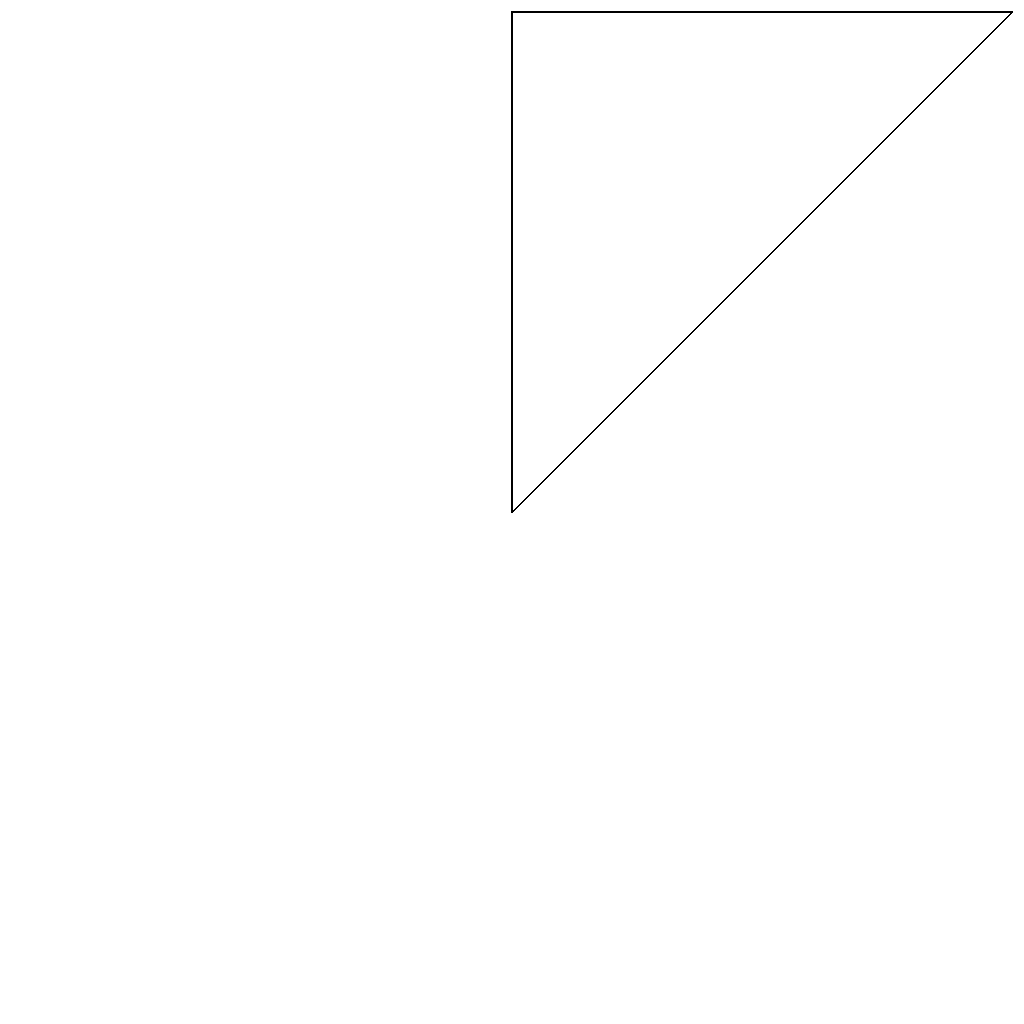

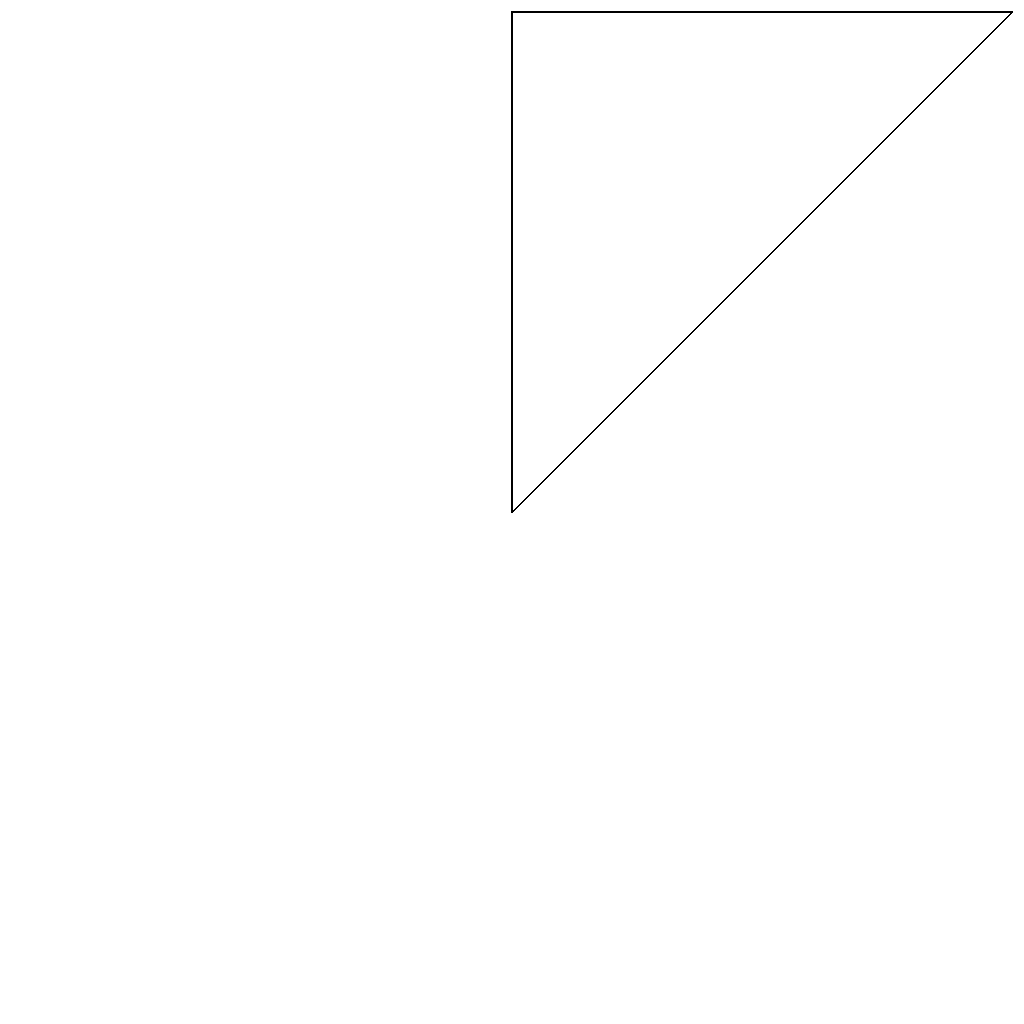

null

In [4]:
Shapes.drawRightAngledTriangle();
Shapes.drawRightAngledTriangle();

Das Programm ist jetzt kürzer und viel einfacher zu verstehen. Ausserdem können wir dieselben Befehle jetzt an beliebigen Stellen in unserem Programm ausführen. 

## Methoden mit Parametern

Unsere Methode ist jedoch noch nicht so nützlich wie sie sein könnte. Das Dreieck wird immer genau gleich gross und an die selbe Stelle im Bild gezeichnet. Die Methode wird viel flexibler, wenn wir sie parametrisieren. In unserem Fall heisst das, dass wir zum Beispiel die Seitengrösse (also die Länge der Ankatheten) als Parameter übergeben. 

In [5]:
class Shapes {
    static void drawRightAngledTriangle(int lengthLegs) {
        clear();
        home();
        forward(lengthLegs);
        turnRight(90);
        forward(lengthLegs);
        turnRight(135);
        forward(Math.sqrt(lengthLegs * lengthLegs + lengthLegs * lengthLegs)) ;
        turnRight(90);
        display(drawing());
    }
}

com.twosigma.beaker.javash.bkr935597af.Shapes

Wir können nun Dreicke mit verschiedenen grössen Zeichnen:

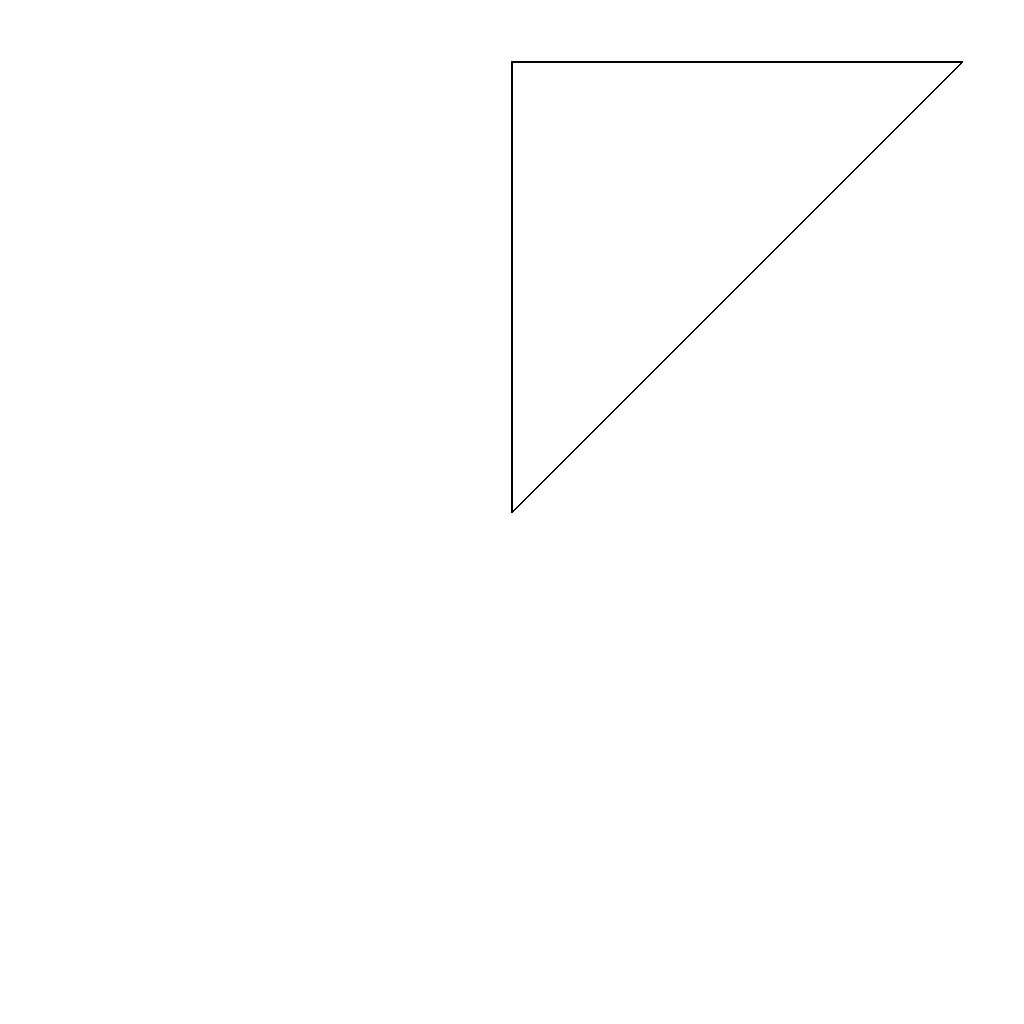

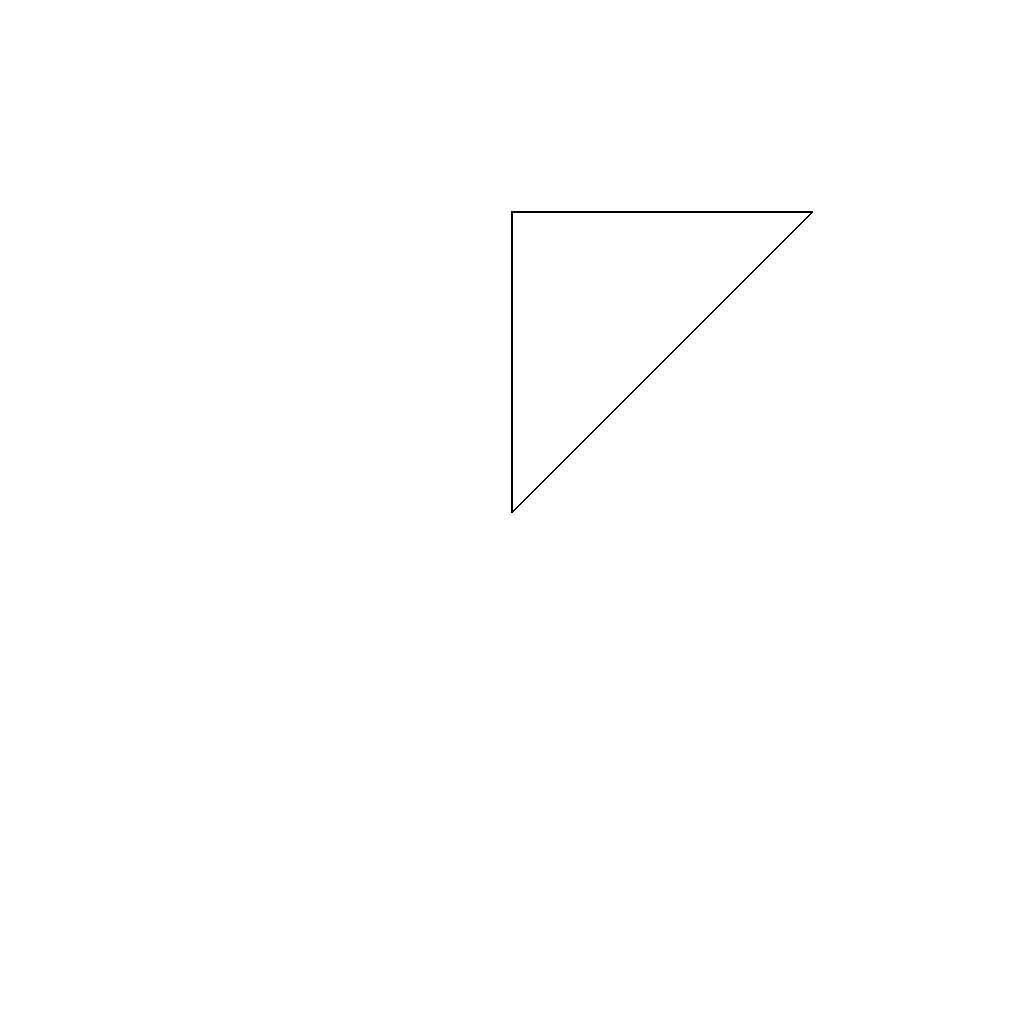

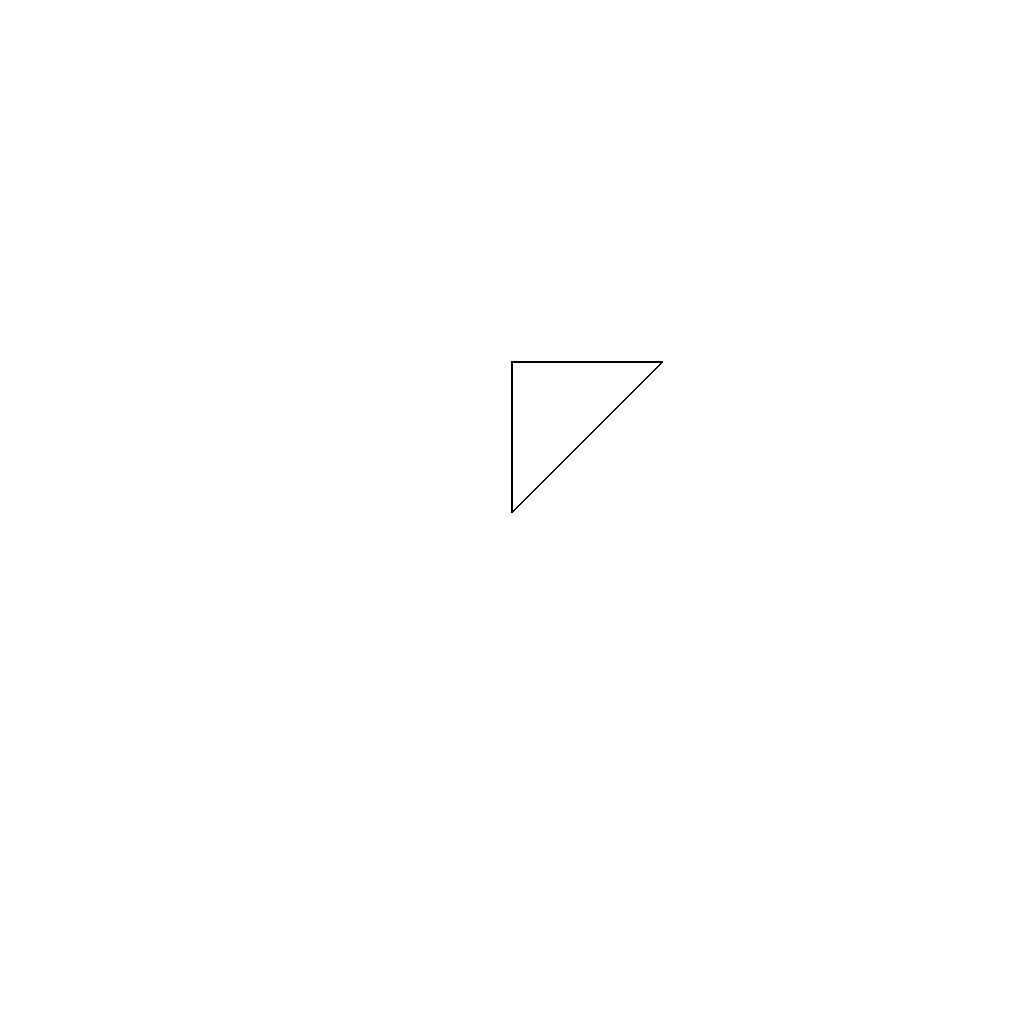

null

In [6]:
Shapes.drawRightAngledTriangle(90);
Shapes.drawRightAngledTriangle(60);
Shapes.drawRightAngledTriangle(30);


#### Miniübung

* Passen Sie die Methode so an, dass Sie auch die Startposition vom Turtle mitübergeben können.

# Funktionen (Methoden mit Rückgabewerte)

Methoden können auch Werte zurückgeben. Methoden, deren Zweck es einzig und alleine ist einen Wert zu berechnen und diesen dann zurückgeben nennen wir Funktionen. In unserem Beispiel wäre ein guter Kandidat für eine Funktion die Berechnung der Länge der Hypothenuse:

Damit können wir unsere Methode noch etwas eleganter schreiben:

In [7]:
class Shapes {
    static double computeLengthHypothenuse(double leg1, double leg2) {
        return Math.sqrt(leg1 * leg1 + leg2 * leg2);
    }
    
    static void drawRightAngledTriangle(int lengthLegs) {
        home();
        clear();
        forward(lengthLegs);
        turnRight(90);
        forward(lengthLegs);
        turnRight(135);
        forward(computeLengthHypothenuse(lengthLegs, lengthLegs)) ;
        turnRight(90);
        display(drawing());
    }
}

com.twosigma.beaker.javash.bkr935597af.Shapes

Wir hoffen ausserdem, dass diese Funktion auch in anderen Programmen nützlich sein, und wir somit diese Funktion nicht immer neu schreiben müssen. 

In [8]:
System.out.println(Shapes.computeLengthHypothenuse(10, 20));

22.360679774997898


null

#### Miniübung
* Schreiben Sie eine Methode drawCircle, die einen Kreis (mit festem Radius) an einer fixen Position zeichnet.
* Schreiben Sie dann eine parameterlose Methode, die die olympischen Ringe zeichnet. 